# Step 2: Enriching and cleaning
This jupyter notebook should only be opened after running the "1-downloading-and-cleaning.py" script. That script will download all the data necesary for this jupyter notebook and save it in the data folder. If it hasnt been run, remove the "#" bellow and run that cell, it will run the script. The next cell will import all the libraries needed to run this jupyter notebook.

In [63]:
#! python 1-downloading-and-cleaning.py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mp

## Loading our data
The previous script downloaded data from transit accidents in Barcelona from 01/01/2010 to 12/31/2021, cleaned it and stored it in a csv file in the folder called "data". It also downloaded weather information for the same period in Bacerlona from the Historical weather API from OpenMeteo:

https://open-meteo.com/

We will now proceed to load this data, enrich it into a single data source (taking the accidents data base and enricihing it with weather data).
First, we need to load the data:

In [45]:
accidents = pd.read_csv("data/accidents_clean.csv")
weather_hourly = pd.read_csv("data/hourly_weather.csv")
weather_daily = pd.read_csv("data/daily_weather.csv")

/var/folders/zt/x4f866fn6v5b11fyl7jzdnk80000gn/T/ipykernel_2123/2871015148.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents = pd.read_csv("data/accidents_clean.csv")


In [46]:
accidents.sample(5)

,Unnamed: 0,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,postal_code,type_day,...,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,utm_coordinate_y,utm_coordinate_x,longitude,latitude,date
65514,65515,2012S002469,2.0,Eixample,24-2-7,la Dreta de l'Eixample,169409.0,Corts Catalanes,9997 9997,Laboral,...,0.0,1.0,0.0,1.0,2.0,"4582556,50","430701,04",NaN,NaN,2012-04-04 15:00:00
17957,17958,2010S003322,3.0,Sants-Montjuïc,32-3-12,la Marina del Prat Vermell,222206.0,Motors,0184 0184,Laboral,...,0.0,3.0,0.0,3.0,2.0,"4578261,81","428965,32",NaN,NaN,2010-05-15 16:00:00
102839,102840,2019S002217,10.0,Sant Martí,66,el Parc i la Llacuna del Poblenou,330107.0,Tànger / Pamplona ...,0014X0014X,Laboral,...,0.0,0.0,0.0,0.0,1.0,"4583547,06","432212,47",2.187859,41.398781,2019-03-21 17:00:00
48093,48094,2011S006758,7.0,Horta-Guinardó,71-7-40,Montbau,24100.0,Harmonia,0001 0001,Laboral,...,0.0,0.0,0.0,0.0,1.0,"4587150,66","428584,31",NaN,NaN,2011-10-07 15:00:00
21379,21380,2010S000341,3.0,Sants-Montjuïc,34-3-18,Sants,43003.0,Blanco,0009 0013,Laboral,...,0.0,1.0,0.0,1.0,2.0,"4580837,25","427628,19",NaN,NaN,2010-01-15 20:00:00


In [47]:
weather_daily.sample(5)

,time,index,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,precipitation_sum,rain_sum,precipitation_hours
995,2012-09-22,daily,24.6,19.8,21.9,21.2,26.9,24.1,2012-09-22T06:37,2012-09-22T18:49,0.0,0.0,0.0
684,2011-11-16,daily,16.7,14.6,15.4,13.1,15.9,14.4,2011-11-16T07:39,2011-11-16T17:32,18.1,18.1,19.0
1873,2015-02-17,daily,15.2,9.7,11.9,6.8,11.1,8.6,2015-02-17T07:42,2015-02-17T18:28,0.0,0.0,0.0
1411,2013-11-12,daily,20.4,10.0,15.3,8.0,18.1,13.9,2013-11-12T07:34,2013-11-12T17:36,0.0,0.0,0.0
1489,2014-01-29,daily,13.4,5.3,9.0,2.1,11.4,6.4,2014-01-29T08:03,2014-01-29T18:04,2.3,2.3,5.0


In [48]:
weather_hourly.sample(5)

,Unnamed: 0,temperature_2m,relativehumidity_2m,dewpoint_2m,precipitation,rain,windspeed_100m,winddirection_100m,soil_temperature_100_to_255cm,soil_moisture_100_to_255cm,date
26222,hourly,15.5,65,9.0,0.0,0.0,13.5,245,14.4,0.148,2012-12-28 14:00:00
14683,hourly,25.2,68,19.0,0.0,0.0,18.9,140,22.3,0.150,2011-09-04 19:00:00
93824,hourly,22.2,84,19.5,0.0,0.0,4.4,351,23.2,0.183,2020-09-14 08:00:00
53892,hourly,15.2,63,8.3,0.0,0.0,2.9,270,11.8,0.180,2016-02-24 12:00:00
43892,hourly,10.0,83,7.3,0.0,0.0,6.1,332,14.6,0.197,2015-01-03 20:00:00


Since we have hour information for every entry in our accidents list, lets add the weather information:

In [52]:
full_data = accidents
full_data = full_data.merge(weather_hourly, left_on="date", right_on="date", how="left")

In [53]:
full_data.sample(5)

,Unnamed: 0_x,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,postal_code,type_day,...,Unnamed: 0_y,temperature_2m,relativehumidity_2m,dewpoint_2m,precipitation,rain,windspeed_100m,winddirection_100m,soil_temperature_100_to_255cm,soil_moisture_100_to_255cm
59322,59323,2017S001752,10.0,Sant Martí,71,Provençals del Poblenou,30409.0,BAC DE RODA ...,0127 0127,Laboral,...,hourly,14.2,83,11.4,0.0,0.0,17.6,145,11.3,0.168
32661,32662,2014S002256,7.0,Horta-Guinardó,74-7-35,el Guinardó,334403.0,Teodor Llorente,0010U0010U,Laboral,...,hourly,14.1,57,5.7,0.0,0.0,20.1,209,11.3,0.144
34915,34916,2014S003463,5.0,Sarrià-Sant Gervasi,52-5-23,Sarrià,305201.0,Sant Joan Bosco,0059 0059,Laboral,...,hourly,18.5,76,14.1,0.0,0.0,14.1,103,14.0,0.143
89945,89946,2013S007508,7.0,Horta-Guinardó,73-7-37,el Carmel,185700.0,Llobregós,0090 0090,Laboral,...,hourly,22.1,69,16.1,0.0,0.0,1.5,346,21.1,0.145
34373,34374,2014S004370,2.0,Eixample,24-2-7,la Dreta de l'Eixample,49509.0,Bruc,0095 0095,Laboral,...,hourly,28.9,51,17.7,0.0,0.0,7.4,219,16.8,0.142


Excelent! Now we have weather information for every incident. Lets clean up a few columns and export our data:

In [55]:
full_data[["date", "year", "month", "day","hour"]].sample(5)

,date,year,month,day,hour
48417,2011-06-23 17:00:00,2011.0,6.0,23.0,17.0
51429,2011-01-03 12:00:00,2011.0,1.0,3.0,12.0
110547,2019-12-25 21:00:00,2019.0,12.0,25.0,21.0
92180,2018-01-07 02:00:00,2018.0,1.0,7.0,2.0
24285,2010-10-26 09:00:00,2010.0,10.0,26.0,9.0


In [54]:
full_data.columns

Index(['Unnamed: 0_x', 'case_id', 'district_id', 'district_name',
       'neighborhood_id', 'neighborhood_name', 'street_code', 'street_name',
       'postal_code', 'type_day', 'year', 'month', 'day', 'hour', 'cyrcadian',
       'cause_incident', 'n_deaths', 'n_wounded_mild', 'n_wounded_severe',
       'n_victims', 'n_vehicles', 'utm_coordinate_y', 'utm_coordinate_x',
       'longitude', 'latitude', 'date', 'Unnamed: 0_y', 'temperature_2m',
       'relativehumidity_2m', 'dewpoint_2m', 'precipitation', 'rain',
       'windspeed_100m', 'winddirection_100m', 'soil_temperature_100_to_255cm',
       'soil_moisture_100_to_255cm'],
      dtype='object')

In [56]:
full_data.drop(['Unnamed: 0_x',"year", "month", "day","hour", "longitude", "latitude", "Unnamed: 0_y"], axis =1, inplace=True)
full_data

,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,postal_code,type_day,cyrcadian,...,date,temperature_2m,relativehumidity_2m,dewpoint_2m,precipitation,rain,windspeed_100m,winddirection_100m,soil_temperature_100_to_255cm,soil_moisture_100_to_255cm
0,2015S005807,-1.0,Desconegut,-1.0,Desconegut,-1.0,Desconegut,Desconegut,Laboral,Matí,...,2015-07-28 12:00:00,26.3,72,20.9,0.0,0.0,19.5,182,22.3,0.184
1,2015S007685,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,134801.0,Freser,0208 0208,Laboral,Tarda,...,2015-10-13 19:00:00,18.0,90,16.4,1.0,1.0,11.2,94,21.2,0.181
2,2015S001364,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,161407.0,Indústria,0336 0336,Laboral,Tarda,...,2015-02-21 21:00:00,8.1,91,6.8,0.2,0.2,1.1,90,10.8,0.197
3,2015S004325,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,226400.0,Las Navas de Tolosa,0343 0343,Laboral,Matí,...,2015-06-05 09:00:00,25.5,42,11.8,0.0,0.0,7.4,241,16.4,0.190
4,2015S005540,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,95506.0,Conca,0032 0034,Laboral,Tarda,...,2015-07-17 20:00:00,26.6,79,22.6,0.0,0.0,11.3,189,21.4,0.185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110649,2019S010046,4.0,Les Corts,21,Pedralbes,101700.0,Doctor Ferran / Manila ...,0025 0025,Laboral,Tarda,...,2019-12-31 15:00:00,13.1,73,8.4,0.0,0.0,13.0,242,14.7,0.171
110650,2019S010047,10.0,Sant Martí,64,el Camp de l'Arpa del Clot,297001.0,Sant Antoni Maria Claret ...,0346 0348,Laboral,Tarda,...,2019-12-31 19:00:00,9.2,83,6.5,0.0,0.0,11.9,245,14.7,0.171
110651,2019S010048,2.0,Eixample,5,el Fort Pienc,28305.0,Ausiàs Marc / Nàpols ...,0080 0080,Laboral,Tarda,...,2019-12-31 16:00:00,12.7,72,7.9,0.0,0.0,13.5,236,14.7,0.171
110652,2019S010049,4.0,Les Corts,19,les Corts,167800.0,Joaquim Molins ...,0009 0009,Laboral,Tarda,...,2019-12-31 21:00:00,8.5,83,5.8,0.0,0.0,6.8,270,14.7,0.171


Now that we have a cleaner data set, lets ananlyze correlations so that we know what to visualize in the next step:

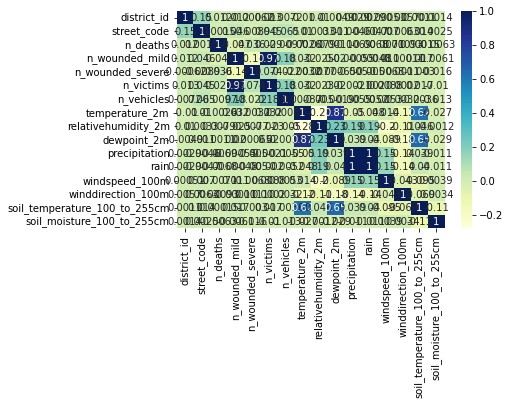

In [64]:
corr_matrix = full_data.corr()
dataplot = sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
mp.show()

Looks like we dont have much correlation between the weather data and the accident data. Lets try grouping the accident data by the day and using our daily weather data to see if we have a stronger correlation (this would add the number of victims per day and might affect the correlation).

In [66]:
accidents_grouped = accidents
accidents_grouped.drop(['Unnamed: 0', 'district_id', 'district_name', 'neighborhood_id', ])

Index(['Unnamed: 0', 'case_id', 'district_id', 'district_name',
       'neighborhood_id', 'neighborhood_name', 'street_code', 'street_name',
       'postal_code', 'type_day', 'year', 'month', 'day', 'hour', 'cyrcadian',
       'cause_incident', 'n_deaths', 'n_wounded_mild', 'n_wounded_severe',
       'n_victims', 'n_vehicles', 'utm_coordinate_y', 'utm_coordinate_x',
       'longitude', 'latitude', 'date'],
      dtype='object')

Looks like we are done! Lets export this as a clean full file to analyze in the next step